In [29]:
# imports

import os
print(os.getcwd())
from scipy.io.wavfile import read
from scipy import signal
from IPython.display import Audio
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



c:\Users\flaco\Documents\ClassRepos\ECE420\Lab2\prelab


In [30]:
# read with_hum data
with_hum_sampling_rate, with_hum_data = read('with_hum.wav')
print("Sampling rate of {} Hz".format(with_hum_sampling_rate))
Audio('with_hum.wav')

Sampling rate of 8000 Hz


In [31]:
# read without_hum data
without_hum_sampling_rate, without_hum_data = read('without_hum.wav')
print("Sampling rate of {} Hz".format(without_hum_sampling_rate))
Audio('without_hum.wav')

Sampling rate of 8000 Hz


## Part 2 - Frequency Response

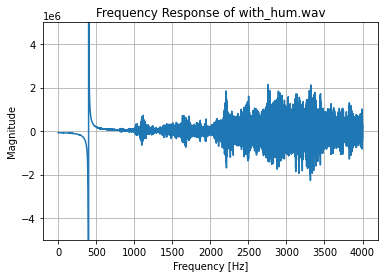

In [32]:
# plotting with_hum data in the frequency domain

spectrum = np.fft.rfft(with_hum_data) # only care about the real part
freq_axis = np.linspace(0, with_hum_sampling_rate/2, len(spectrum))

plt.plot(freq_axis, spectrum)
plt.grid(True)
plt.title("Frequency Response of with_hum.wav")
plt.ylim(-0.5e7, 0.5e7) # to get better view of viable content
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.show()

## Part 3 - Notch Filter Design

We want to filter out the 400 Hz humming interference out from the with_hum.wav so we want to design a bandstop filter that will surpress signals around that frequency.

In [33]:
#Utility function for dB scaling of magnitude spectra
def sig2db(mag_spec):
    return 20*np.log10(mag_spec)

7 coefficients for 3 taps
13 coefficients for 6 taps
19 coefficients for 9 taps


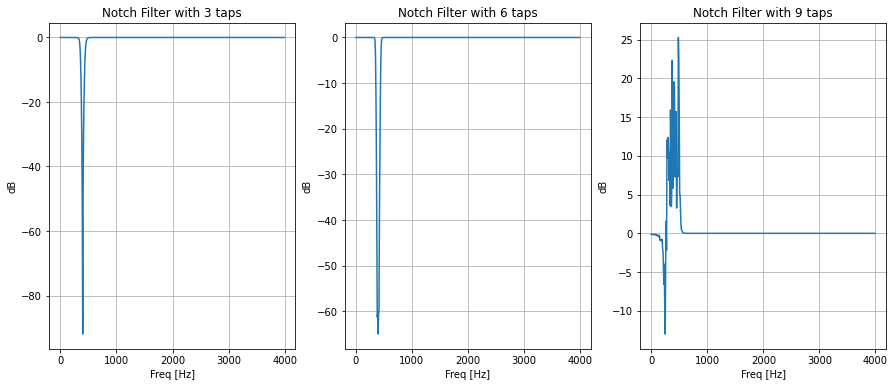

In [34]:
# other method https://swharden.com/blog/2020-09-23-signal-filtering-in-python/
# num_taps = 3 # orignal
num_taps = 9 # better but creates more coefficients
num = []
den = []
subplots = [131, 132, 133]
plt.figure(figsize=(15,6))
taps = [3, 6, 9]
for i in range(len(taps)):
    num_taps = taps[i]
    b, a = signal.butter(num_taps, [350, 450], btype='bandstop', fs=with_hum_sampling_rate)
    num.append(b)
    den.append(a)
    print("{} coefficients for {} taps".format(len(b), num_taps))
    w, h = signal.freqz(b, a, fs=with_hum_sampling_rate)
    plt.subplot(subplots[i])
    plt.grid(True)
    plt.title("Notch Filter with {} taps".format(num_taps))
    plt.xlabel("Freq [Hz]")
    plt.ylabel("dB")
    plt.plot(w, sig2db(abs(h)))

#### Brifely discribe your filter design. Why does your filter have the number of taps that it has? Could you achieve the same effect with less taps? What are the practical effects of using less taps?

**Answer**: I tested out a few taps as seen above. I decided on settling with 3 for filtering in part 4. I chose 3 because it used less coeffecients and didn't appear unstable as when I chose 9 taps. Since the graphs looks similar for 3 and 6 taps, you can definitely achieve the same effect with less taps. The practical effects of using less taps is you save computational power and memory since you don't need to store as many coefficients. 

## Part 4 - Apply Filtering

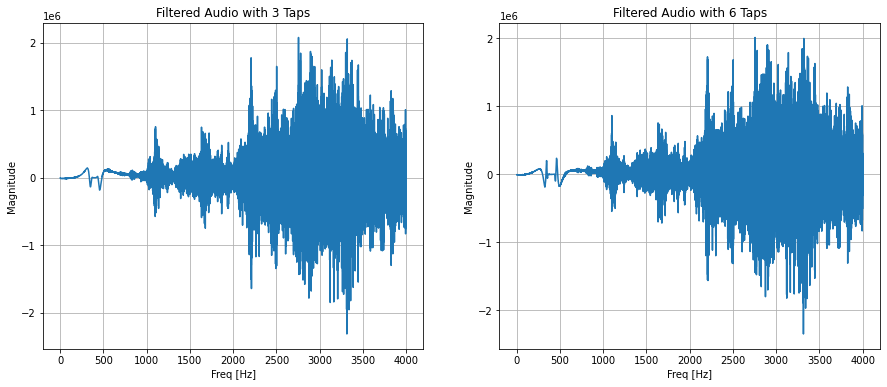

In [36]:
# applying the filter
plt.figure(figsize=(15,6))
b = num[0] # want to use filter created with most taps
a = den[0]
filtered = signal.lfilter(b, a, signal.lfilter(b, a, with_hum_data))
freq_filtered = np.fft.rfft(filtered) # only plot the real part
freq = np.linspace(0, with_hum_sampling_rate/2, len(freq_filtered))
plt.subplot(121)
plt.grid(True)
plt.title("Filtered Audio with {} Taps".format(3))
plt.xlabel("Freq [Hz]")
plt.ylabel("Magnitude")
plt.plot(freq, freq_filtered)

b = num[1] # want to use filter created with most taps
a = den[1]
filtered = signal.lfilter(b, a, signal.lfilter(b, a, with_hum_data))
freq_filtered = np.fft.rfft(filtered) # only plot the real part
freq = np.linspace(0, with_hum_sampling_rate/2, len(freq_filtered))
plt.subplot(122)
plt.grid(True)
plt.title("Filtered Audio with {} Taps".format(6))
plt.xlabel("Freq [Hz]")
plt.ylabel("Magnitude")
plt.plot(freq, freq_filtered)

Audio(filtered, rate=with_hum_sampling_rate) # audio with 9 taps